<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [29]:
import pandas as pd
import re
import numpy as np
import plotly
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [30]:
data = pd.read_csv('C:/Users/Mv81/Jupyter/Skillfactory/data/dst-3.0_16_1_hh_database.csv', sep = ';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [31]:
display(data)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано
...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [33]:
data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 2014 Тюменский Государствен...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [34]:
def education(arg):
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
data['Образование'] = data['Образование и ВУЗ'].apply(education)
print(data['Образование'])
data = data.drop('Образование и ВУЗ', axis=1) #Удаляю столбец 'Образование и ВУЗ'
print(data['Образование'].value_counts()['среднее'])

0        неоконченное высшее
1                     высшее
2        среднее специальное
3                     высшее
4                     высшее
                ...         
44739                 высшее
44740                 высшее
44741                 высшее
44742                 высшее
44743                 высшее
Name: Образование, Length: 44744, dtype: object
559


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [35]:
def gender(arg):
    arg.split(',')[0]
    if 'Мужчина' in arg:
        return 'М'
    else:
        return 'Ж'
    
data['Пол'] = data['Пол, возраст'].apply(gender)
print(data['Пол'])

# Напишем функцию, которая разделит по запятой и проблелу строку и возьмём второе значение. Сразу пробразуем в целые числа
data['Возраст'] = data['Пол, возраст'].apply(lambda x: re.split(r'[, ]+', x)[1]).astype (int)

#Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
print(round(data['Пол'].isin(['Ж']).sum(axis=0)/data['Пол'].shape[0]*100, 2)) 
print(round(data['Возраст'].mean(), 1)) #Чему равен средний возраст соискателей? Ответ округлите до десятых
data = data.drop('Пол, возраст', axis=1) #Удаляю столбец 'Пол, возраст'

0        М
1        М
2        Ж
3        М
4        Ж
        ..
44739    М
44740    М
44741    Ж
44742    М
44743    М
Name: Пол, Length: 44744, dtype: object
19.07
32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [36]:
def experience(arg):
    if arg is np.nan or arg == 'Не указано': 
        return np.nan        # возвращаю Nan, если не указано в ячейке
    arg_split = arg.split()[2:7]  # выделяю список со 2 по 7 значение
    year_list = ['год', 'года', 'лет'] # задаю список возможных вариантов слова год
    month_list = ['месяц', 'месяцев', 'месяца']   # задаю список возможных вариантов слова месяц
    years = 0 
    month = 0
    for i, item in enumerate(arg_split): # прохожу циклом по списку из выделенных значений
        if item in year_list:
            years = int(arg_split[i-1]) # выбираю значение перед найденным словом из справочника
        if item in month_list:
            month = int(arg_split[i-1]) # выбираю значение перед найденным словом из справочника
    return int(years*12+month) # перевожу годы в месяцы и складываю с месяцами

data['Опыт работы (месяц)'] = data['Опыт работы'].apply(experience) # применяю функцию к каждому значению  встолбце

#Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print(data['Опыт работы (месяц)'].median())

data = data.drop('Опыт работы', axis=1) #удаляю столбец после преобразований

100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [37]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                  'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ] #Список гшородв-миллионников

#Создаю функцию, которая будет определять принадлежность города по критериям
def city(arg):
    arg_split = arg.split(' ,')[0]
    if arg_split == 'Москва':
        return 'Москва'
    if arg_split == 'Санкт-Петербург':
        return 'Санкт-Петербург' 
    if arg_split in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'
    
data['Город'] = data['Город, переезд, командировки'].apply(city) # применяю функцию к столбцу

#Выведу полный текст первых 10 строк, чтобы посмотреть варианты написания
data.head(10)['Город, переезд, командировки'].values

#Функция для определения «Готовность к переезду» два возможных варианта: True или False
def removal(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    else:
        return True
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(removal)

#Функция для определения «Готовность к командировкам», два возможных варианта: True или False. 
def trip(arg):
    arg_split = arg.split(', ')[-1]
    lst_trip = ['готов к редким командировкам', 'готова к редким командировкам', 'готов к командировкам', 'готова к командировкам']
    if arg_split in lst_trip:
        return True
    else:
        return False  
                
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(trip)

#Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого
print(round(data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100)) 

#Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
print(round(data[data['Готовность к переезду'] & data['Готовность к командировкам']].shape[0] / data.shape[0] *100))

#Выполните преобразования и удалите столбец «Город, переезд, командировки» из таблицы.
data = data.drop('Город, переезд, командировки', axis=1) #удаляю столбец после преобразований

11
32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [38]:
#Выведу полный текст первых 20 строк, чтобы посмотреть варианты написания
#data.head(20)['Занятость'].values

#Проверю предложенный список для занятости
#df_unique = data['Занятость'].unique()
#result = ", ".join(df_unique)
#result = result.split(', ')
#print(set(result))

# Создадим списки для занятости и графика работы
employments = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for employment, chart in zip(employments, charts):
    data[employment] = data['Занятость'].apply(lambda x: employment in x)
    data[chart] = data['График'].apply(lambda x: chart in x)
    
#Удалим столбцы Занятость и график
data = data.drop(['Занятость', 'График'], axis=1)

# сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
print(data[data['проектная работа'] & data['волонтерство']].shape[0])

# Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
print(data[data['вахтовый метод'] & data['гибкий график']].shape[0])      

436
2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [39]:
# экспортируемый скачанный файл с курсом валют и создадим отдельный DF
data_exchange = pd.read_csv('C:/Users/Mv81/Jupyter/Skillfactory/data/ExchangeRates.csv', sep = ',')
data_exchange['date'] = pd.to_datetime(data_exchange['date']).dt.date
#data_exchange.head()

#Обновляю признак "Обновление резюме" из таблицы с резюме, переведя его в формат datetime и выделив из него дату
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date
#print(data['Обновление резюме'])

#Выделяю из столбца «ЗП» сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. 
data['Сумма ЗП'] = data['ЗП'].apply(lambda x: int(x.split()[0]))

#Наименование валюты перевести в стандарт ISO.
# создадим справочник соответствия валюты
currency = {'USD': 'USD', 
        'KZT': 'KZT',
        'грн': 'UAH', 
        'белруб': 'BYN',
        'EUR': 'EUR', 
        'KGS': 'KGS',
        'сум': 'UZS', 
        'AZN': 'AZN',
        'руб': 'RUB'
}
# применим к справочнику по ключу
data['Валюта ЗП'] = data['ЗП'].apply(lambda x: currency.get(x.split()[1].replace('.', ''))) 

#Присоединяю к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты. 
#Значение close для рубля заполняю единицей 1 (курс рубля самого к себе).
merged = data.merge(
    data_exchange,
    left_on=['Валюта ЗП', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
)
#display(merged.head())
#После объединения значения столбцов close и proportion для резюме, где желаемая заработная плата указана в рублях будут пропусками. 
fill_data = merged.copy()

fill_data['close'] = fill_data['close'].fillna(1) #Заполняю пропуски с помощью метода fillna()
fill_data['proportion'] = fill_data['proportion'].fillna(1)

#Умножить сумму желаемой заработной платы на присоединённый курс валюты (close) и разделить на пропорцию. 
#Результат занести в новый столбец «ЗП (руб)».
fill_data['ЗП (руб)'] = fill_data['Сумма ЗП'] * fill_data['close'] / fill_data['proportion']

#Удалите исходный столбец заработной платы «ЗП» и все промежуточные столбцы, если вы их создавали
fill_data = fill_data.drop(['ЗП','Сумма ЗП', 'Валюта ЗП', 'vol', 'currency', 'per', 'date', 'time'], axis=1)

#Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
#Ответ приведите в тысячах рублей и округлите до целого. Например, если у вас получилась медианная з/п 42 127, в качестве ответа укажите 42.
print(round(fill_data['ЗП (руб)'].median()/1000))
#давайте сверимся, столько строк и столбцов должно содержаться в текущей версии таблицы. Воспользуйтесь методом info() для вашей текущей таблицы
fill_data.info()

C:\Users\Mv81\AppData\Local\Temp\ipykernel_10972\2615898432.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



59
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятост

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

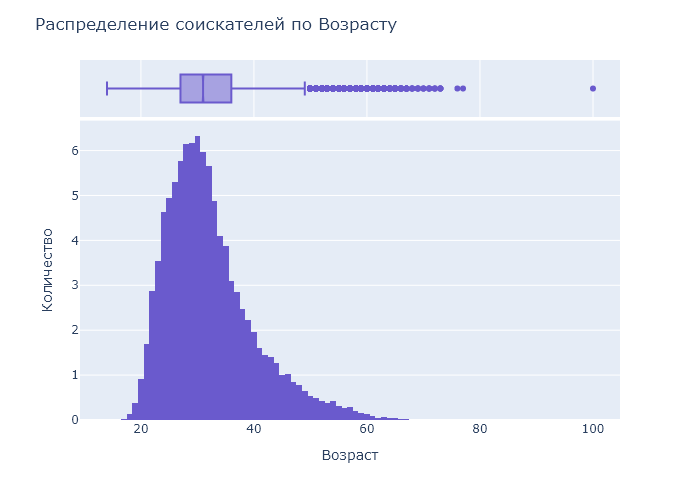

Минимальный возраст: 14
Максимальный возраст: 100
Медиана: 31.0
мода: 0    30
Name: Возраст, dtype: int64


In [40]:
# построим гистограмму и коробчатую диаграмму
fig = px.histogram(fill_data, x="Возраст", marginal = 'box', color_discrete_sequence=['slateblue'], histnorm='percent', width=700,) 
fig.update_layout(
    title_text = 'Распределение соискателей по Возрасту', # заголовок
    xaxis_title_text = 'Возраст', # подпись к оси x
    yaxis_title_text = 'Количество', # подпись к оси y    
)
fig.show('png')
# определим возрастные рамки
print('Минимальный возраст:', fill_data['Возраст'].min())
print('Максимальный возраст:', fill_data['Возраст'].max())
print('Медиана:', fill_data['Возраст'].median())
print('мода:', fill_data['Возраст'].mode())

Модальное распеделение соответствует возрасту в 30 лет. Предельные значения: соискатели от 14 до 100 лет. Возраст большинства соискателей в пределах от 27 до 36 лет. К аномальным признакам отнесу выбросы от 76 лет и старше.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

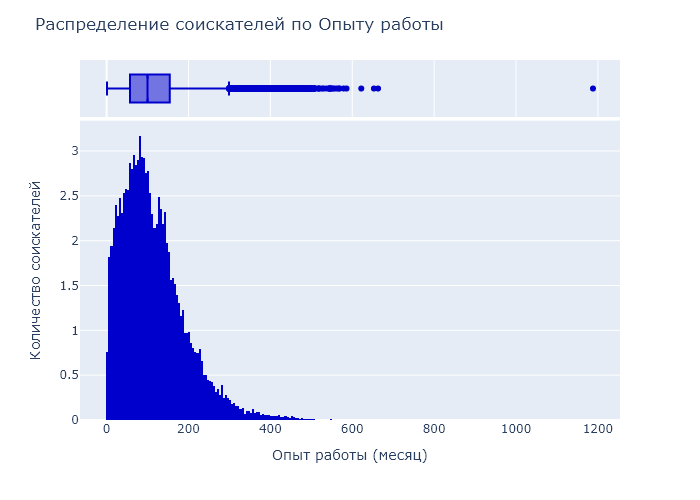

Минимальный опыт работы: 1.0
Максимальный опыт работы: 1188.0
Медиана: 100.0
мода: 0    81.0
Name: Опыт работы (месяц), dtype: float64


In [41]:
#Постройте распределение признака «Опыт работы (месяц)». Опишите распределение, отвечая на следующие вопросы:
fig = px.histogram(fill_data, x="Опыт работы (месяц)", marginal = 'box', 
                   color_discrete_sequence=['mediumblue'], histnorm='percent', width=700,
) 
fig.update_layout(
    title_text = 'Распределение соискателей по Опыту работы', # заголовок
    xaxis_title_text = 'Опыт работы (месяц)', # подпись к оси x
    yaxis_title_text = 'Количество соискателей', # подпись к оси y    
)
fig.show('png')

#Чему равна мода распределения?
#Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?
#Есть ли аномалии для признака? Если есть, то какие значения вы бы причислили к таковым?
print('Минимальный опыт работы:', fill_data['Опыт работы (месяц)'].min())
print('Максимальный опыт работы:', fill_data['Опыт работы (месяц)'].max())
print('Медиана:', fill_data['Опыт работы (месяц)'].median())
print('мода:', fill_data['Опыт работы (месяц)'].mode())

Опыт работы большинства соискателей в интервале от 57 до 154 месяцев. К аномальным признакам отнесу выброс в 1188 месяцев (99 лет)

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


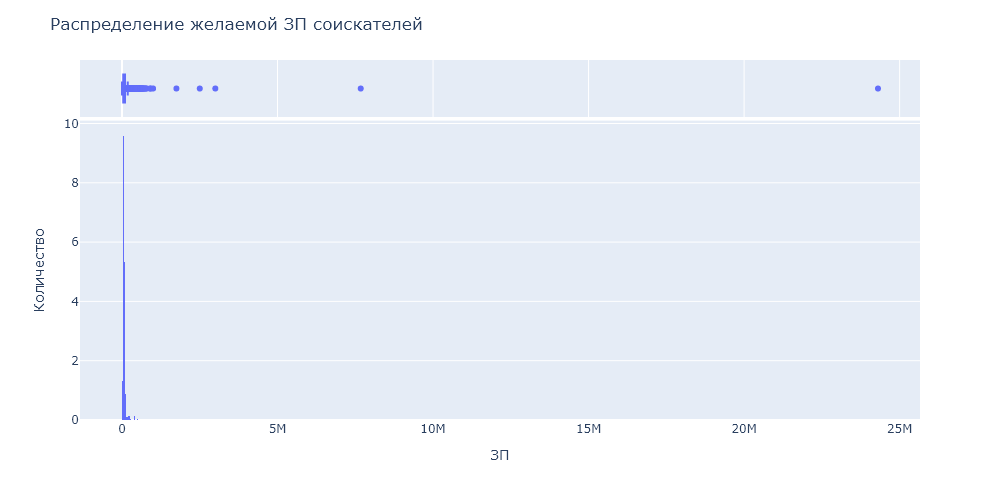

Минимальная желаемая ЗП: 1.0
Максимальная желаемая ЗП: 24304876.0
Медиана: 59000.0
мода: 0    50000.0
Name: ЗП (руб), dtype: float64


In [42]:
fig = px.histogram(fill_data, x="ЗП (руб)", marginal = 'box', histnorm='percent', width=1000,) 
fig.update_layout(
    title_text = 'Распределение желаемой ЗП соискателей', # заголовок
    xaxis_title_text = 'ЗП', # подпись к оси x
    yaxis_title_text = 'Количество', # подпись к оси y    
)
fig.show('png')

#Чему равна мода распределения?
#Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?
#Есть ли аномалии для признака заработной платы? Если есть, то какие значения вы бы причислили к таковым?
print('Минимальная желаемая ЗП:', fill_data['ЗП (руб)'].min())
print('Максимальная желаемая ЗП:', fill_data['ЗП (руб)'].max())
print('Медиана:', fill_data['ЗП (руб)'].median())
print('мода:', fill_data['ЗП (руб)'].mode())

Мода 50 тыс руб. Желаемая ЗП большинства соискателей от 37 до 95 тыс. Анамалии - желаемые ЗП в 24 млн, 7.6 млн, 3, 2.5, 1.75 млн.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

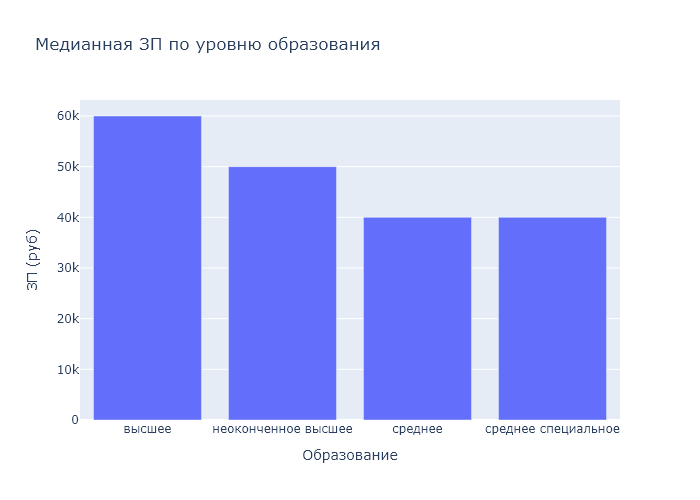

In [43]:
bar_data = fill_data[fill_data['ЗП (руб)']<1e6].groupby('Образование', as_index=False).agg({'ЗП (руб)': 'median'})
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    title='Медианная ЗП по уровню образования'
)
fig.show('png')

Наибольший уровень ЗП для категории с высшим образованием, наименьший уровень у категории Среднее специальное 
Признак уровня образования важен. 
У категории Высшее образовани ожидание в 1,5 раза выше, чем у сровня Среднее специальное

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

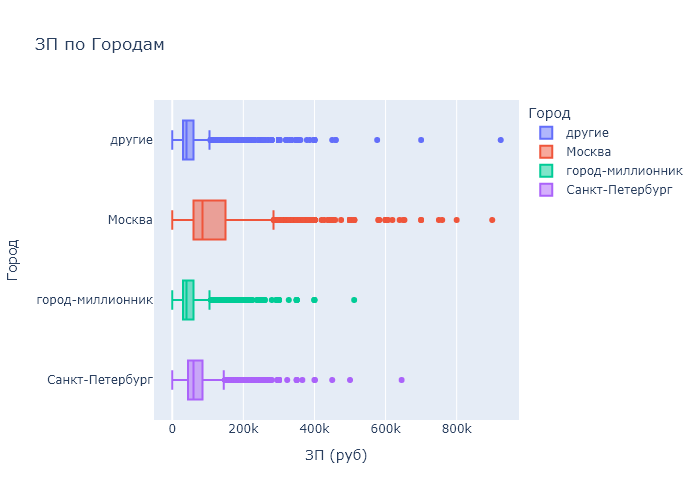

In [44]:
city_data = fill_data[fill_data['ЗП (руб)']<1e6]
fig = px.box(
    data_frame=city_data,
    y='Город',
    x='ЗП (руб)',
    color = 'Город',
    title='ЗП по Городам'
)
fig.show('png')

В Москве самы большойразброс ожиданий по ЗП. Колеблется от 60 до 150 тыс
Самые большие ожидания в Москве, в СПб в 2 раза меньше, в остальных городах, в 2 раза меньше чем в СПб.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

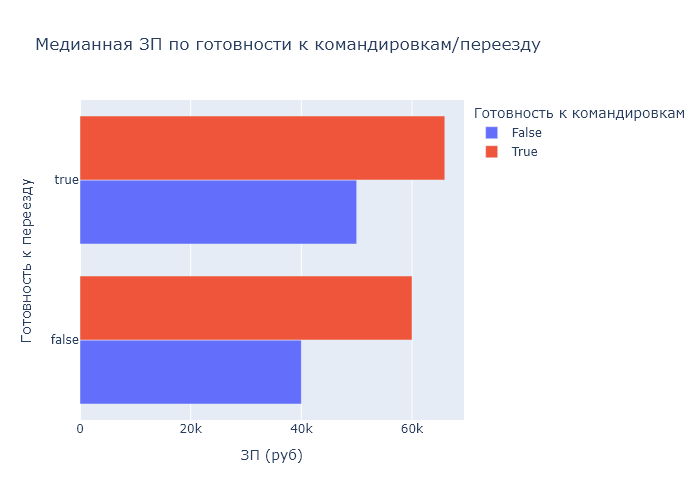

In [45]:
bar_data = fill_data.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная ЗП по готовности к командировкам/переезду'
)
fig.show('png')

За более высокую оплату труда соискатели готовы к переездам или к командировкам.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

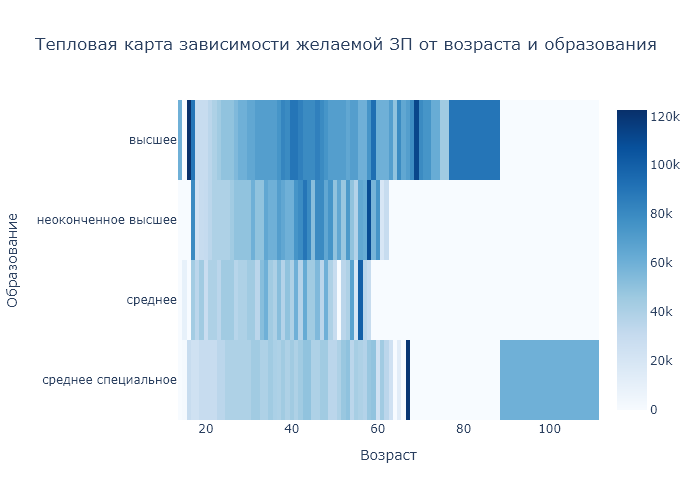

In [46]:
pivot = fill_data.pivot_table(values = 'ЗП (руб)', index='Образование', columns='Возраст', aggfunc='median', fill_value=0)

#По полученной сводной таблице постройте тепловую карту.
fig = px.imshow(pivot, text_auto=True, aspect='auto', color_continuous_scale='blues', title='Тепловая карта зависимости желаемой ЗП от возраста и образования')
fig.show('png')

Максимальная ЗП у группы Высшее образование. У этой же группы наблюдается самый быстрый рост ЗП, который немного снижается к пенсионному возрасту. 
Средне специальное образование максимум по ЗП достигает к 30 годам и далее ожидания по ЗП практически не растут. 
Аналогичная картина наблюдается в группе Среднее образование, но здесь ожидания по ЗП немного выше и максимум наблюдается к 35 годам.
Неоконченное высшее достигает максимума к 40 годам.
Самая "долго" работающая группа  - с Высшим образованием. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

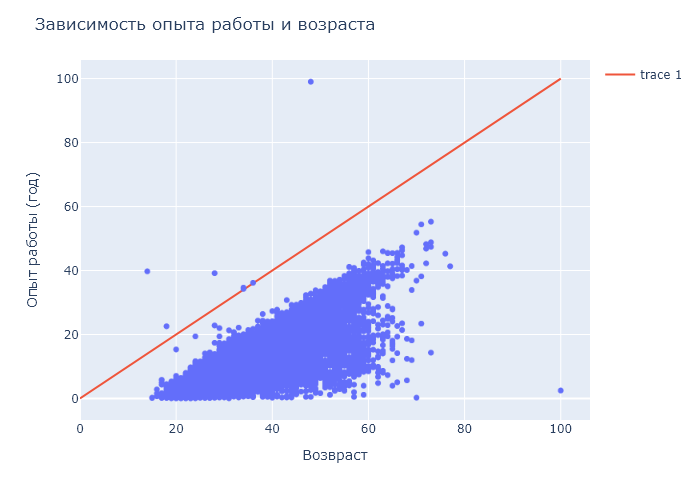

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,гибкий график,волонтерство,удаленная работа,стажировка,вахтовый метод,close,proportion,ЗП (руб),Опыт работы (год)
4535,Технический специалист,а,а,2019-04-11,Не указано,среднее специальное,Ж,18,271.0,другие,...,True,False,False,True,False,False,1.0000,1.0,15000.0,22.583333
19351,Специалист (Junior-программист),"Русский свет, ООО",Электрик,2019-04-26,Не указано,высшее,М,28,470.0,другие,...,False,False,False,False,False,False,1.0000,1.0,20000.0,39.166667
19872,Аналитик,Kyivstar,Фахівець з опису бізнес процесів,2019-04-26,Не указано,высшее,М,34,416.0,другие,...,False,False,False,False,False,False,24.2962,10.0,60740.5,34.666667
26477,Менеджер IT-проектов,"М©й IT'M (""Информационные Технологии' Менеджм...",Основатель,2019-04-08,Не указано,высшее,М,34,411.0,Санкт-Петербург,...,True,True,True,True,True,True,1.0000,1.0,80000.0,34.250000
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,высшее,М,14,477.0,Москва,...,False,False,False,False,False,False,1.0000,1.0,60000.0,39.750000
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,2019-04-16,Не указано,высшее,М,48,1188.0,город-миллионник,...,False,True,False,True,False,True,1.0000,1.0,60000.0,99.000000
43451,Руководитель отдела разработки,ЛАНИТ,Руководитель проекта,2018-08-17,Не указано,высшее,М,36,434.0,Москва,...,False,False,False,False,False,False,1.0000,1.0,200000.0,36.166667


In [47]:
fill_data['Опыт работы (год)'] = (fill_data['Опыт работы (месяц)']/12)

fig = px.scatter(
    fill_data, 
    x = 'Возраст', 
    y = 'Опыт работы (год)', 
    
)

fig.add_trace(go.Scatter(
    x=[0, 100], 
    y=[0, 100],
    mode='lines'
))
fig.update_layout(
    title_text = 'Зависимость опыта работы и возраста', # заголовок
    xaxis_title_text = 'Возвраст', # подпись к оси x
    yaxis_title_text = 'Опыт работы (год)', # подпись к оси y 
    
)

fig.update_coloraxes(showscale=False) 
#отображаем график
fig.show('png')

display(fill_data[fill_data['Опыт работы (год)'] > fill_data['Возраст']]) #выведу резюме, находящиеся выше красной линии

Для каждого возраста присутствуют соискатели как с соизмеримым с возрастом опытом, так и новички. Эта тенденция сохраняется до пенсионного возраста.
После отметки в 60 лет соискателей меньше, и график уже не показывает такой стройности в визуализации. 
Удивительно, что для каждого возраста есть соискатели с небольшим опытом работы. Вероятно в текущих реалиях люди часто переквалифицируются и меняют профессию. 

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


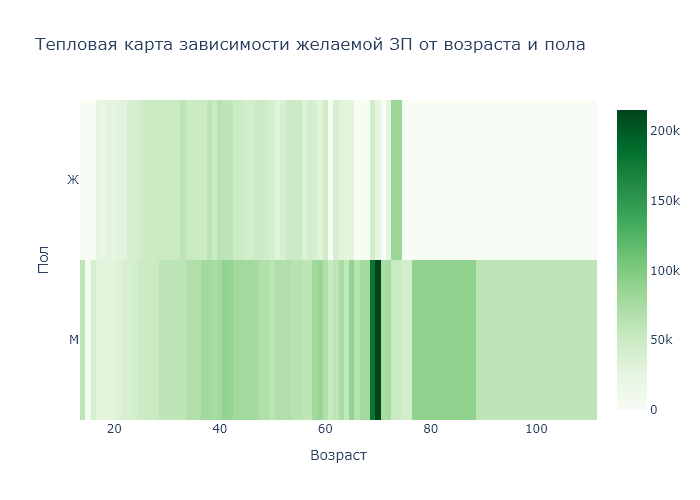

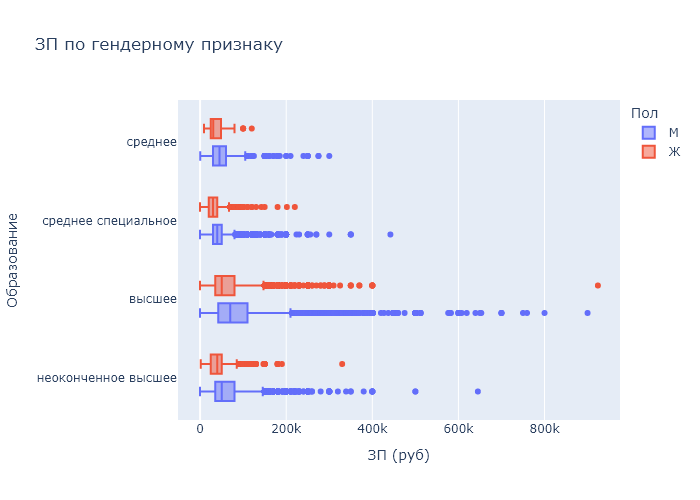

In [48]:
# Построю распределение желаемой ЗП в записимости от признака Пол и Возраст. 
# построю 2 графика
pivot = fill_data.pivot_table(values = 'ЗП (руб)', index='Пол', columns='Возраст', aggfunc='median', fill_value=0)

#По полученной сводной таблице постройте тепловую карту.
fig = px.imshow(pivot, text_auto=True, aspect='auto', 
                color_continuous_scale='greens', title='Тепловая карта зависимости желаемой ЗП от возраста и пола'
)
fig.show('png')

# Дополнительно построю коробчатую диаграмму, сравнения желаемой ЗП менее 1 млн у мужчин и женщин 
gender_data = fill_data[fill_data['ЗП (руб)']<1e6]
fig = px.box(
    data_frame=gender_data,
    y='Образование',
    x='ЗП (руб)',
    color = 'Пол',
    
    title='ЗП по гендерному признаку'
)

fig.show('png')

Женщины в 1,5 раза запрашивают ЗП ниже, чем мужчин. С возрастом у женщин желаемая ЗП растет не сильно, в отличие от мужчин. Так если в 25 лет медиана по гендерному признаку не отличается, то к 40 годам разница между ожиданиями в 1,5 раза.
Ожидания у мужчин от 40 до 100 тыс, медиана 60. У женщин от 30 до 70, медиана 48.
Вне зависмости от образования мужчины заправшивают больше, чем женщины

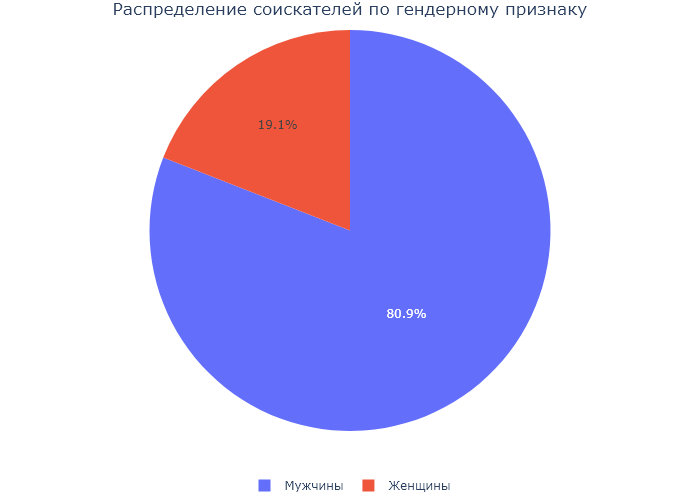

In [49]:
fill_data_gender = fill_data['Пол'].value_counts()
fig = px.pie(fill_data_gender, values=fill_data_gender, names={'М': 'Мужчины', 'Ж': 'Женщины'}
)

fig.update_layout(
    title='Распределение соискателей по гендерному признаку',
    title_x = 0.5,
    margin=dict(l=0, r=0, t=30, b=0),
    legend_orientation="h",
    legend=dict(x=.5, xanchor="center")
)
fig.show('png')

Соискателей женщин только 19% , т.е. женщин соискателей в 4 раза меньше, чем мужчин

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [50]:
dupl_columns = list(fill_data.columns)

mask = fill_data.duplicated(subset=dupl_columns)
data_duplicates = fill_data[mask]
print(f'Число найденных дубликатов: {data_duplicates.shape[0]}')
data = fill_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {data.shape[0]}')

Число найденных дубликатов: 161
Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [51]:
null_data = data['Опыт работы (месяц)'].isnull().sum()
display(null_data[null_data > 0])

array([168])

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [52]:
data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(data['Опыт работы (месяц)'].median())
print(round(data['Опыт работы (месяц)'].mean()))

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [53]:
outliers = data[(data['ЗП (руб)'] < 1000) | (data['ЗП (руб)'] > 1000000)]
#print(outliers.info())

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [54]:
experience = data[data['Опыт работы (год)'] > data['Возраст']]
data = data.drop(experience.index)
print(experience.shape[0])

7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по методу z-отклонения: 3
Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44571


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,гибкий график,волонтерство,удаленная работа,стажировка,вахтовый метод,close,proportion,ЗП (руб),Опыт работы (год)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,...,False,True,False,True,False,False,1.0,1.0,10000.0,0.166667
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,...,False,False,False,False,False,False,1.0,1.0,2000.0,0.250000
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,False,True,True,False,1.0,1.0,60000.0,2.500000


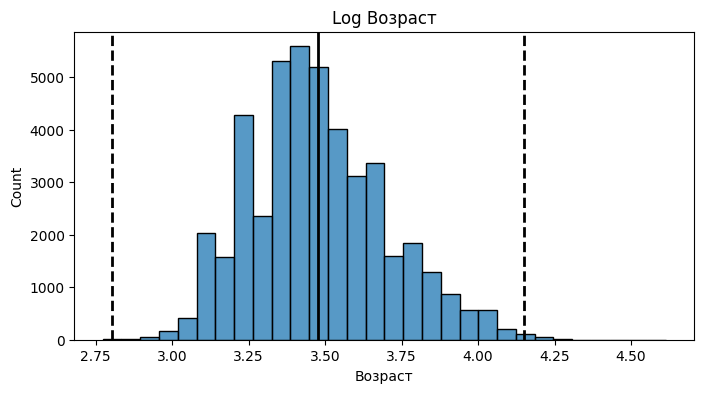

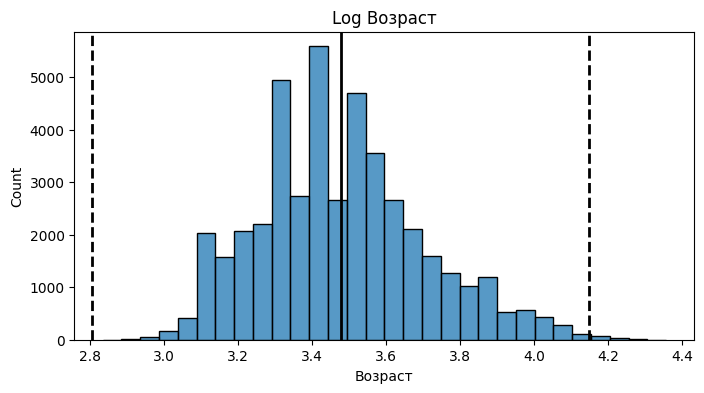

In [55]:
#функция будет возвращать выбросы и очищенные от них данные:
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

#Применим эту функцию к таблице dat и признаку 'Возраст', а также выведем размерности результатов:
outliers, cleaned = outliers_z_score_mod(data, 'Возраст', left=3,  right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')

#Построим график в логарифмическом масштабе
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Возраст');

#Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. 
#Давайте сделаем "послабление" на 1 сигму (возьмите 4 сигмы) в правую сторону. 
#Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?
outliers, cleaned = outliers_z_score_mod(data, 'Возраст', left=3, right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
display(outliers)

data = data.drop(outliers.index) #Удаляю выбросы

# Ещё раз строю график, уже очищенный от выбросов.
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_age = np.log(data['Возраст'] + 1)
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Возраст');

Соискатели в возрасте 15 и 100 лет попадают под категорию выбросов
Распределение ассиметрично в правую сторону. Можно сделать вывод, что соискатели больше ищут работу от начала трудовой деятельности до медианного значения, после медианного постепенно поиск идёт на спад